In [3]:
import platform
from pathlib import Path
from datetime import datetime, timedelta
import datajoint as dj
dj.blob.use_32bit_dims = True # necessary for pd.blob read


from create_trials_df import create_trials_df_from_dj
from create_days_df import create_days_df_from_dj, lazy_load_days_summary_df

from plot_trials_info import *
from multiplot_summaries import *

import plot_utils as pu
import dj_utils as dju
import dir_utils as du


# settings
%load_ext autoreload
%autoreload 2
sns.set_context("talk")

[2023-09-21 14:49:41,627][INFO]: Connecting jbreda@bdata00.pni.princeton.edu:3306
[2023-09-21 14:49:41,997][INFO]: Connected jbreda@bdata00.pni.princeton.edu:3306


In [4]:
# PATHS
if platform.system() == "Windows":
    FIGURES_PATH = Path(
        "C:\\Users\\JB\\github\\jbreda_animal_training\\figures\\rats\\cohort1"
    )
    DATA_PATH = Path("C:\\Users\\JB\\github\\jbreda_animal_training\\data\\days_dfs")
else:
    FIGURES_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/figures/rats/cohort1"
    )
    DATA_PATH = Path(
        "/Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs"
    )

# ANIMALS
ANIMAL_IDS = ["C214", "C215", "C220", "C221", "C223"]
mode = "yesterday"

if mode == "today":
    date = datetime.today().date()
    latest_date = None
elif mode == "yesterday":
    date = datetime.today().date() - timedelta(days=1)
    latest_date = date.strftime("%Y-%m-%d")

# DATES
date_min, date_max = dju.return_date_window(latest_date=latest_date, n_days_back=20)

In [5]:
# LOAD IN TRIALS DATA
trials_df = create_trials_df_from_dj(animal_ids=ANIMAL_IDS, date_min=date_min)

fetched 20 sessions for C214 between 2023-08-31 and 2023-09-20
fetched 19 sessions for C215 between 2023-08-31 and 2023-09-20
fetched 20 sessions for C220 between 2023-08-31 and 2023-09-20
fetched 20 sessions for C221 between 2023-08-31 and 2023-09-20
fetched 20 sessions for C223 between 2023-08-31 and 2023-09-20


In [6]:
c222 = create_trials_df_from_dj(animal_ids=["C222"], date_min=date_min)

trials_df = pd.concat([trials_df, c222], axis=0)

fetched 20 sessions for C222 between 2023-08-31 and 2023-09-20


In [8]:
# PLOT TRIALS DATA
multiplot_single_day_summaries(
    trials_df, figures_path=FIGURES_PATH, save_out=True, overwrite=False
)

making C222_2023-09-20_day_summary
['s_a', 'delay', 's_b']
making C223_2023-09-20_day_summary


In [9]:
# # DISPLAY TRIALS DATA
# multiplot_single_day_summaries(
#     trials_df, figures_path=FIGURES_PATH, save_out=False, overwrite=False
# )

In [10]:
# LOAD IN DAYS DATA
# days_df = create_days_df_from_dj(
#     animal_ids=ANIMAL_IDS + ["C222"], date_min=date_min, date_max=date_max
# )
f_name = "C2s_days_df.csv"

# days_df.to_csv(DATA_PATH / f_name, index=False)


days_df = lazy_load_days_summary_df(
    date_min=date_min,
    date_max=date_max,
    animal_ids=ANIMAL_IDS + ["C222"],
    save_dir=DATA_PATH,
    f_name=f_name,
    save_out=True,
)

# days_df = pd.read_csv(DATA_PATH / f_name)

partial dj load with new date min 2023-08-31 -> 2023-09-20
Returning appended df with entries between 2023-08-31 and 2023-09-20
Saved out appended df to /Users/jessbreda/Desktop/github/jbreda_animal_training/data/days_dfs/C2s_days_df.csv


/Users/jessbreda/Desktop/github/jbreda_animal_training/code/training_performance/plot_days_info.py:943: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.lineplot(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


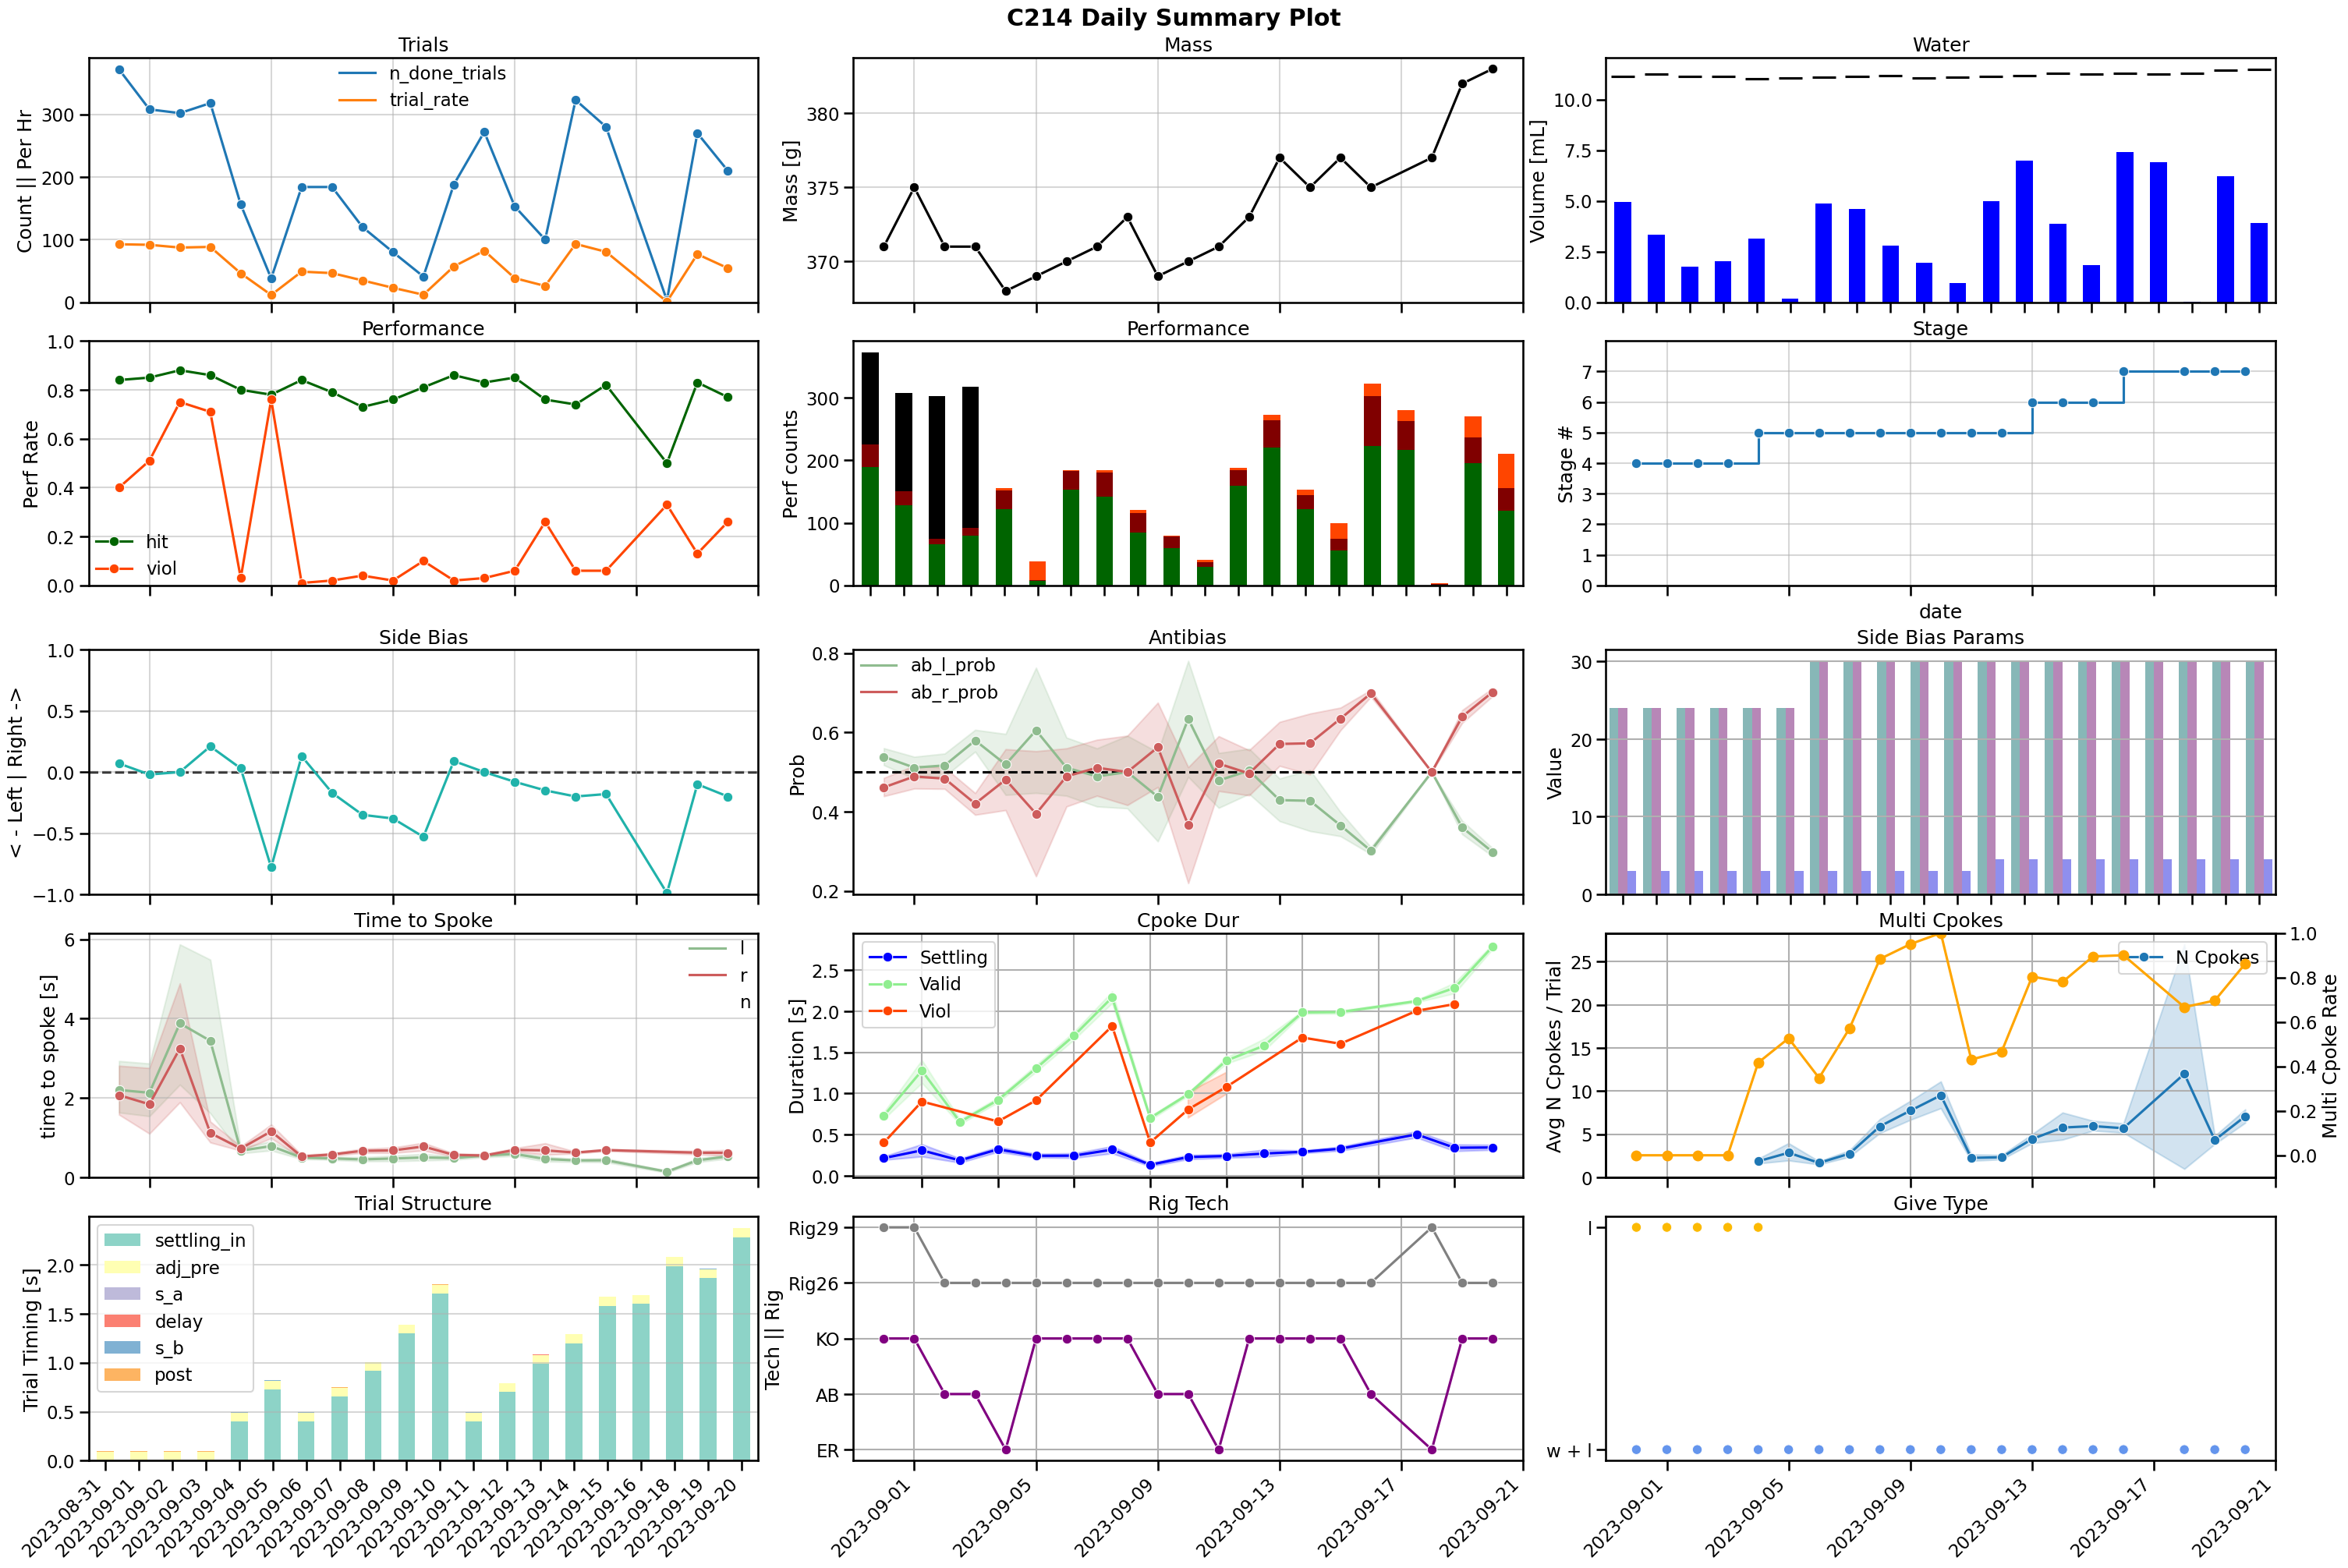

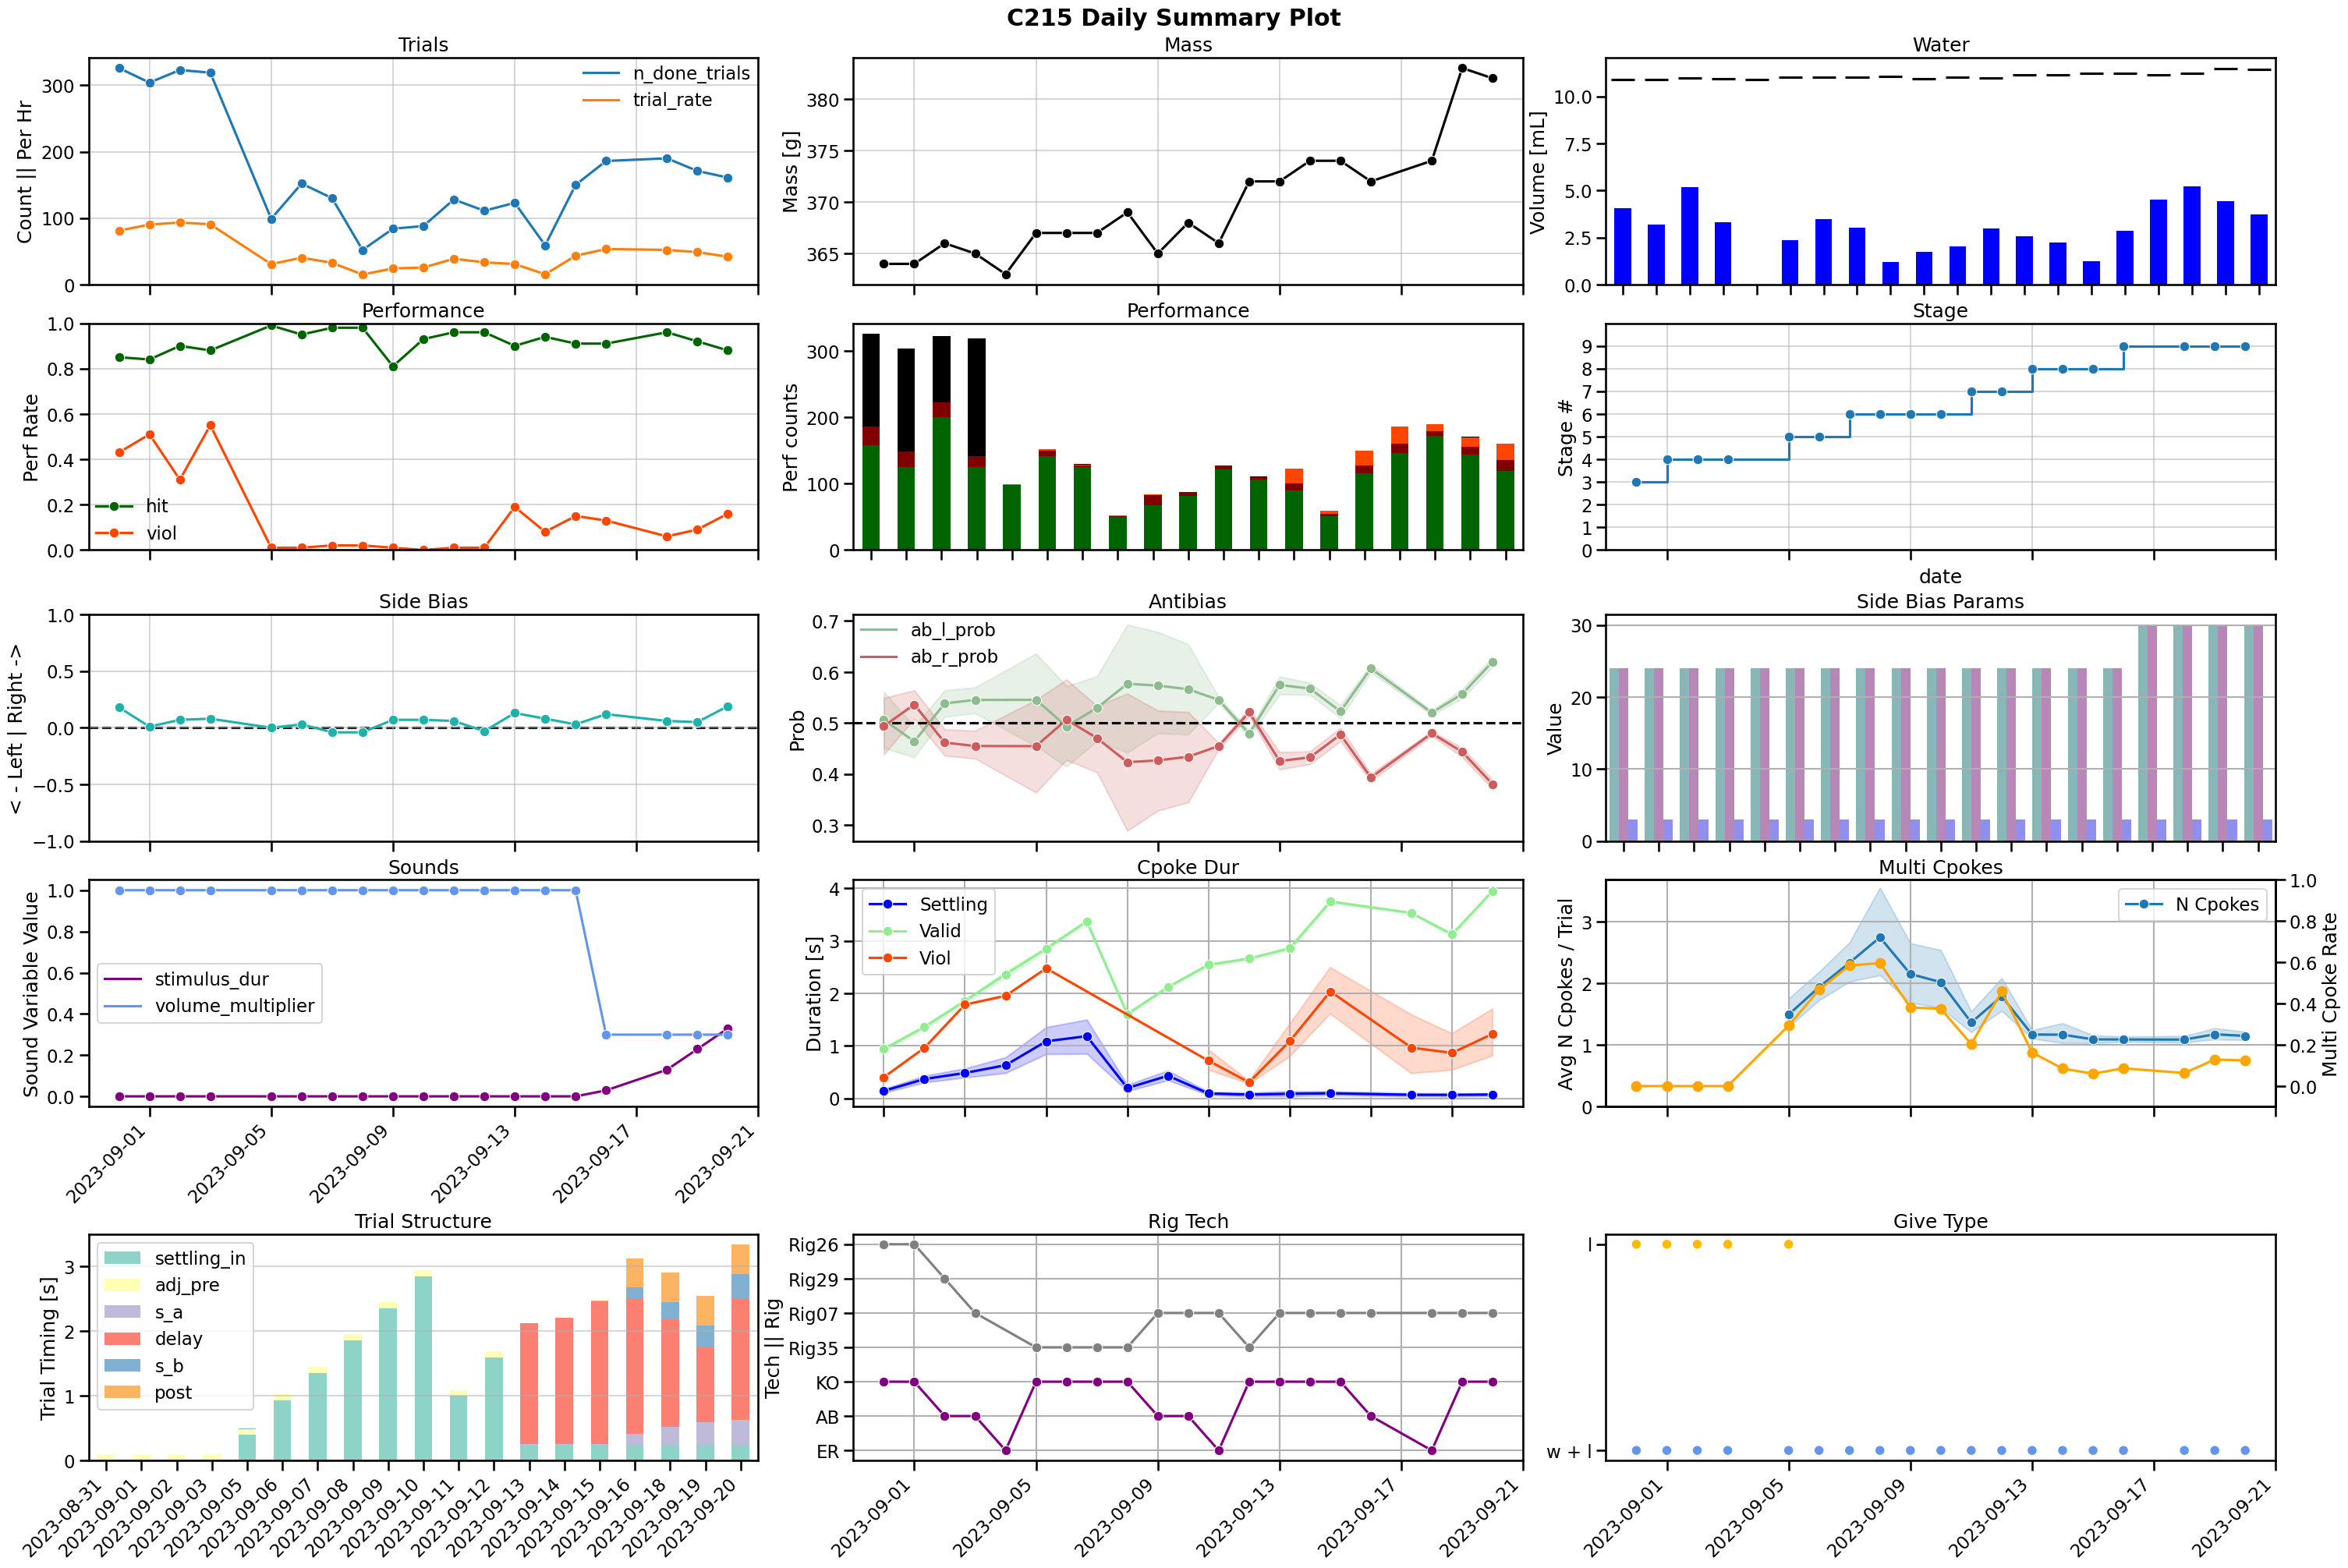

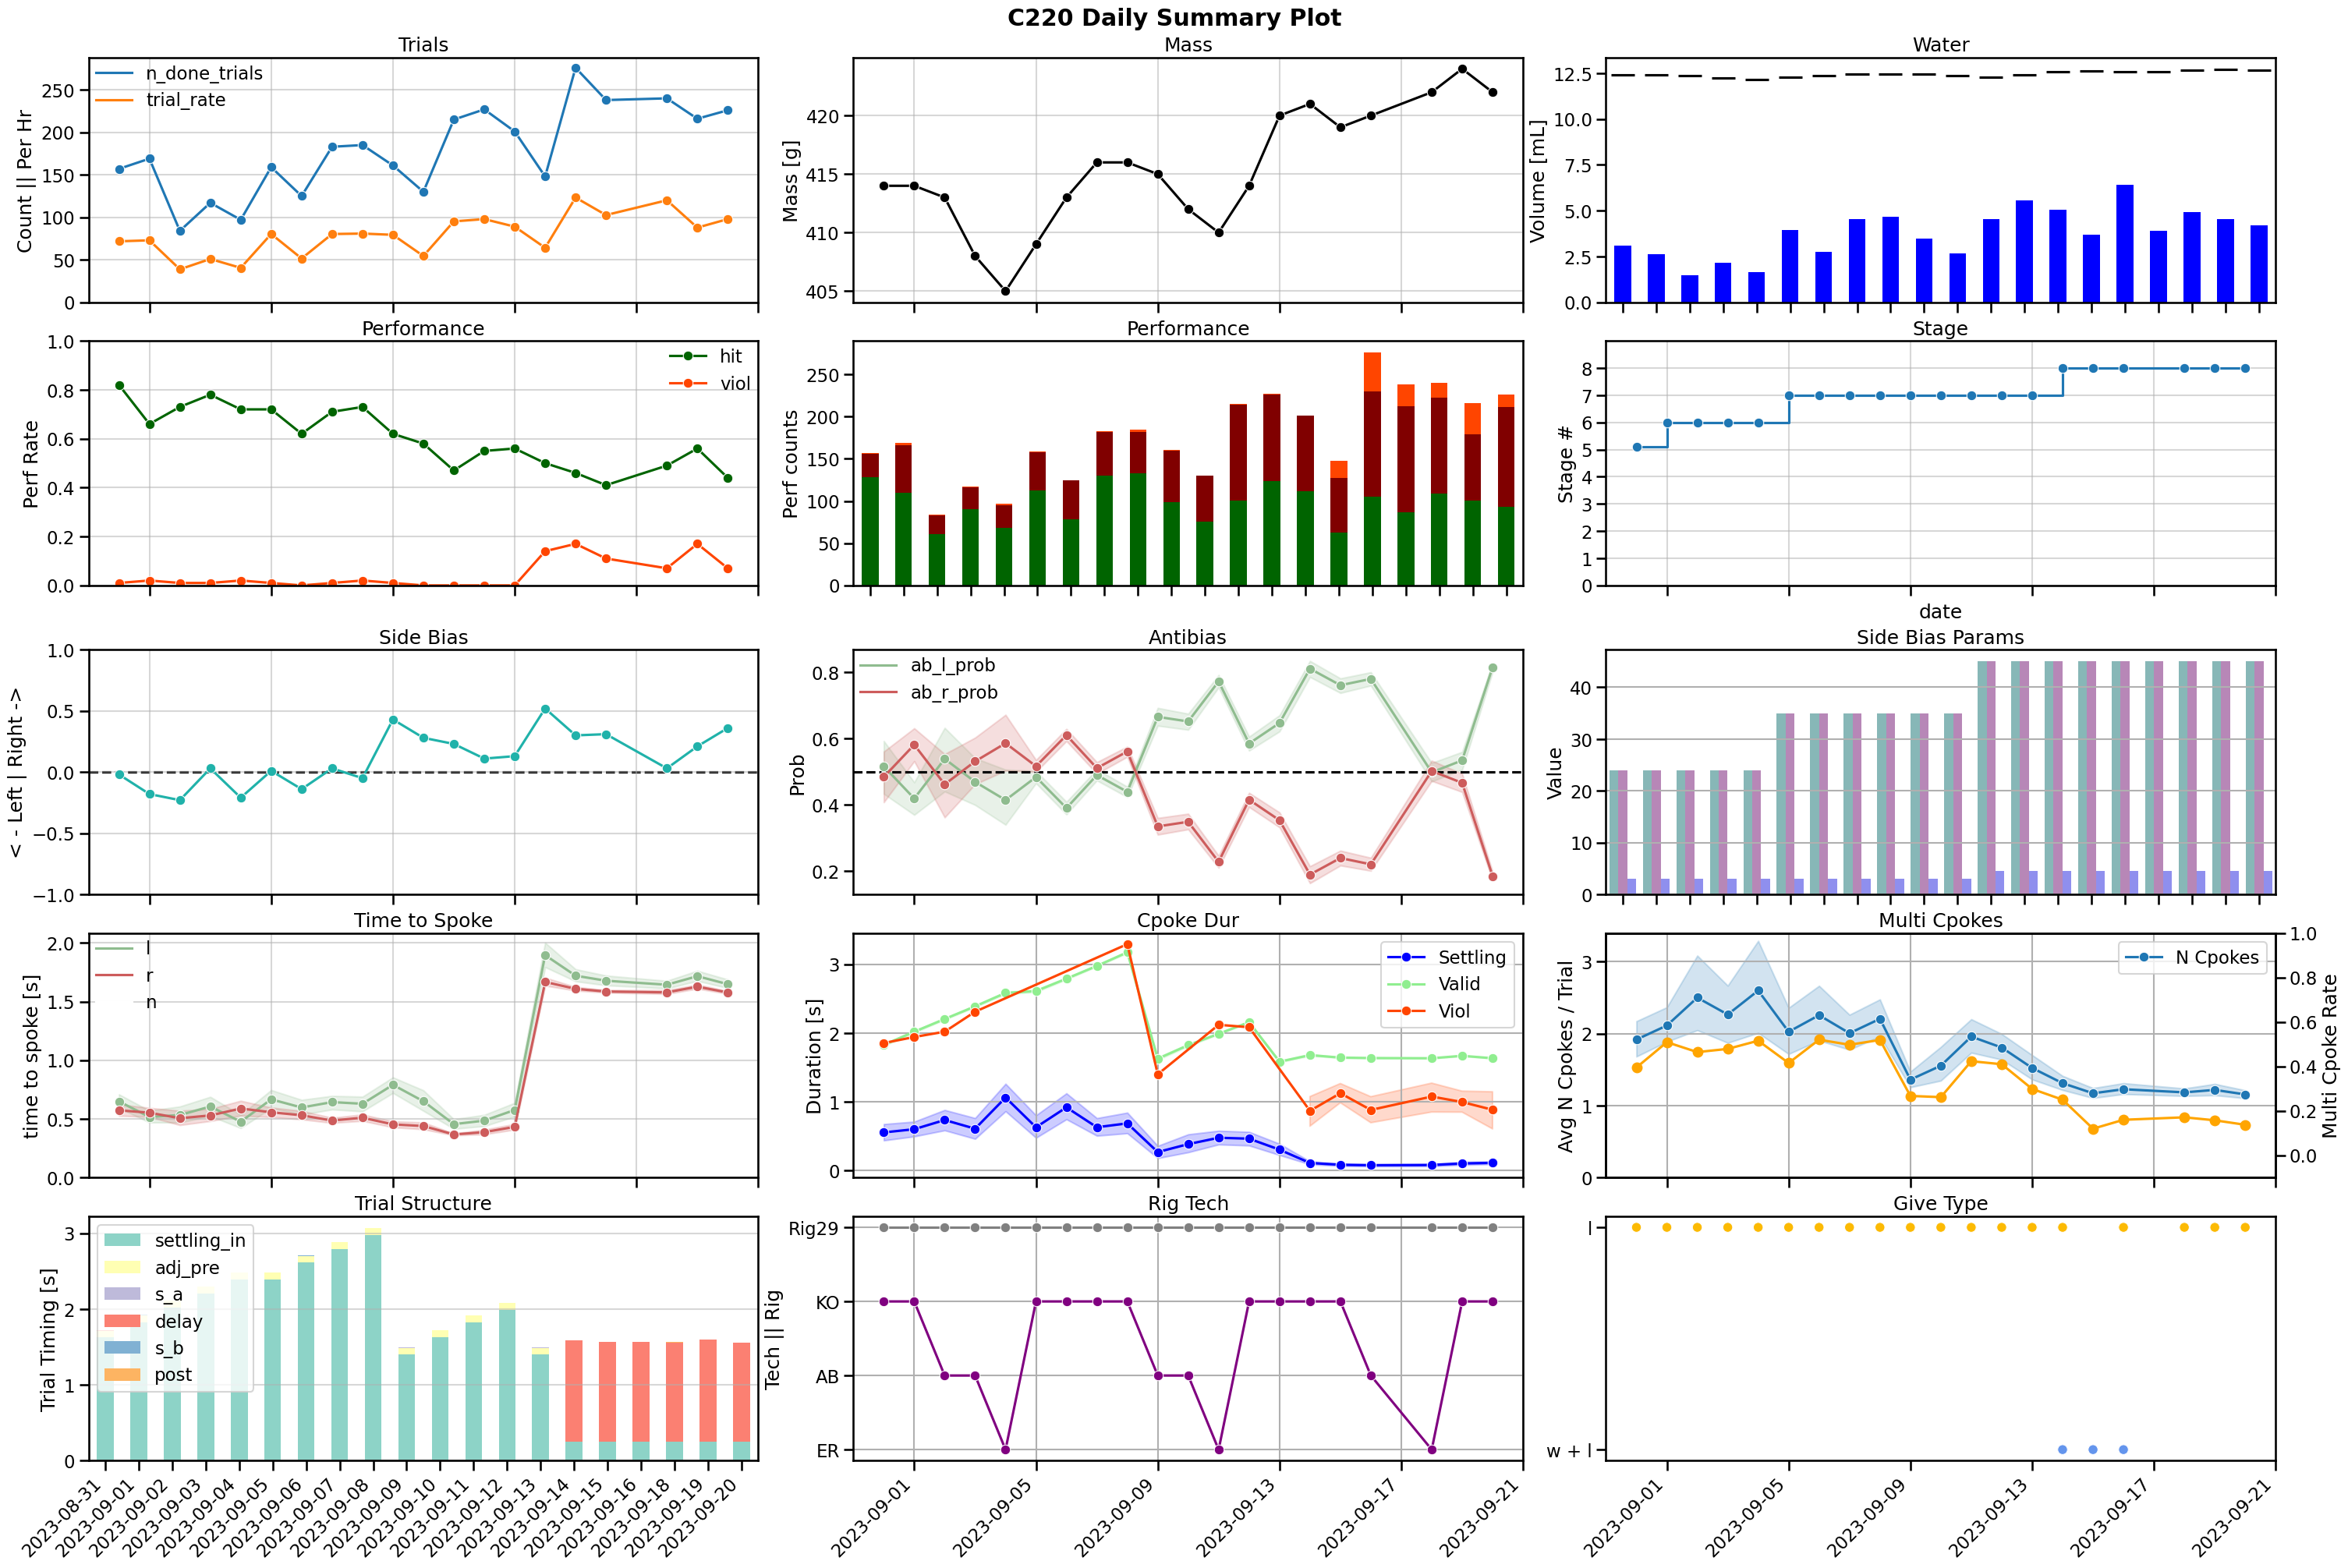

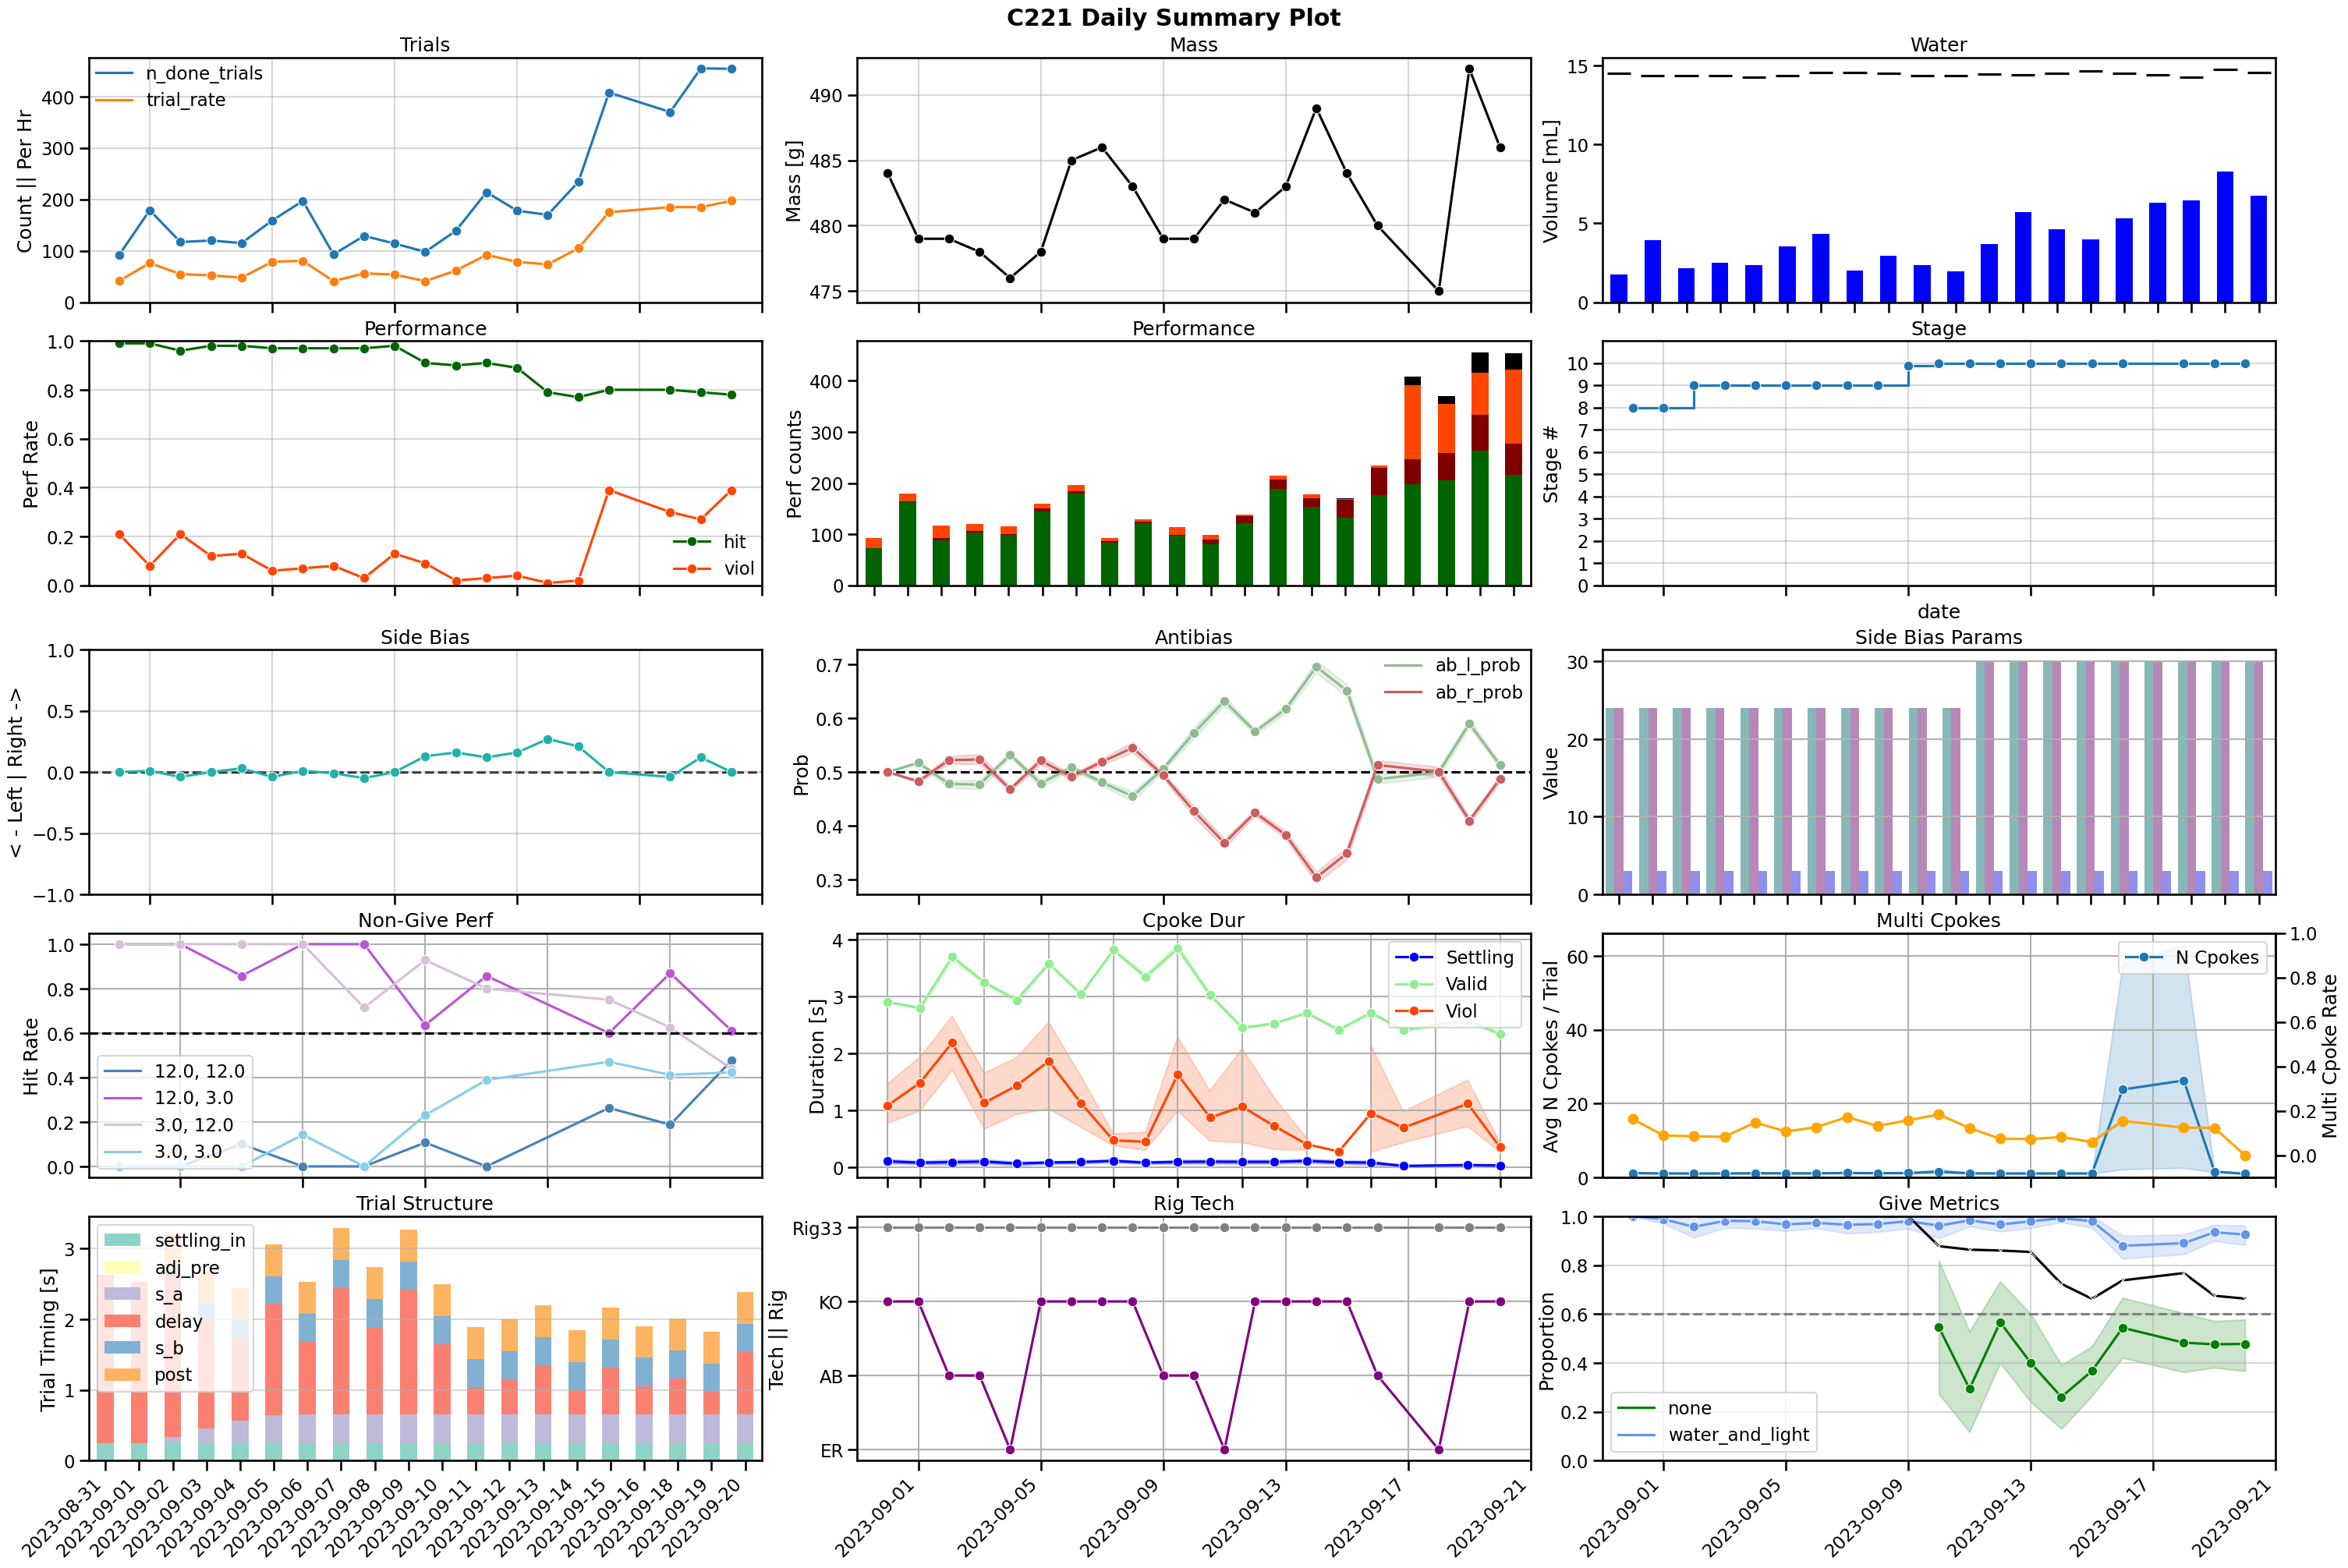

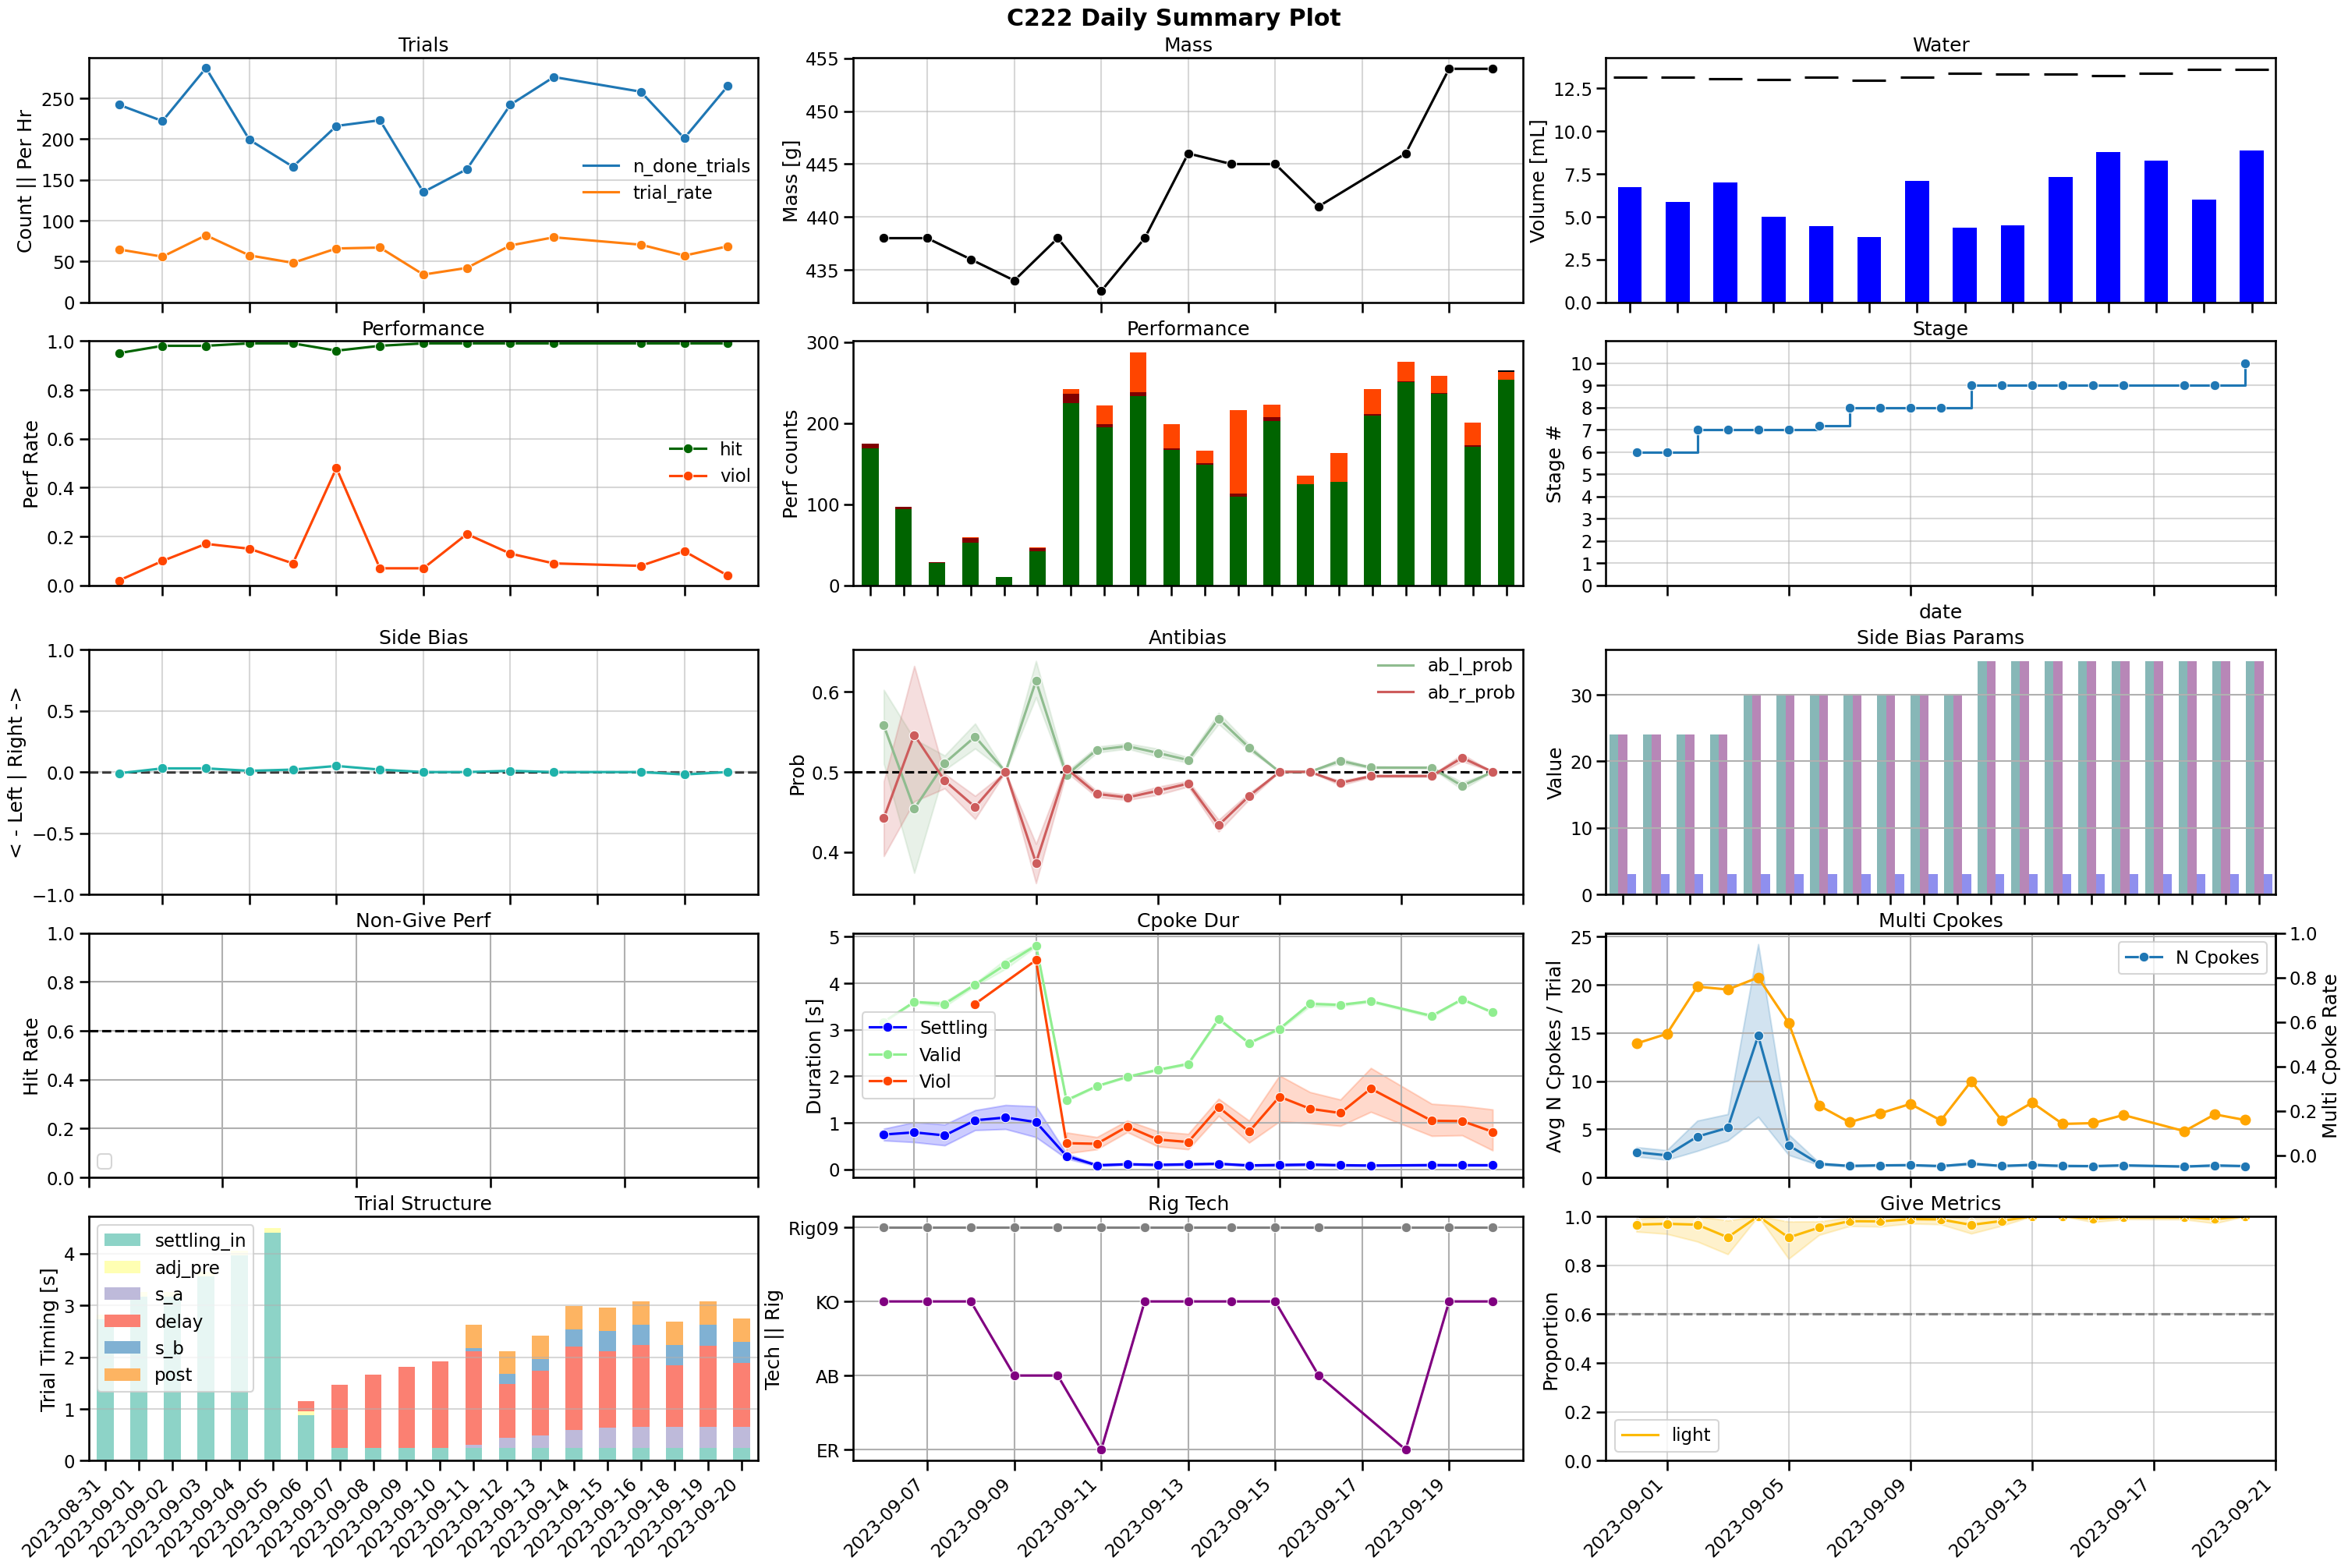

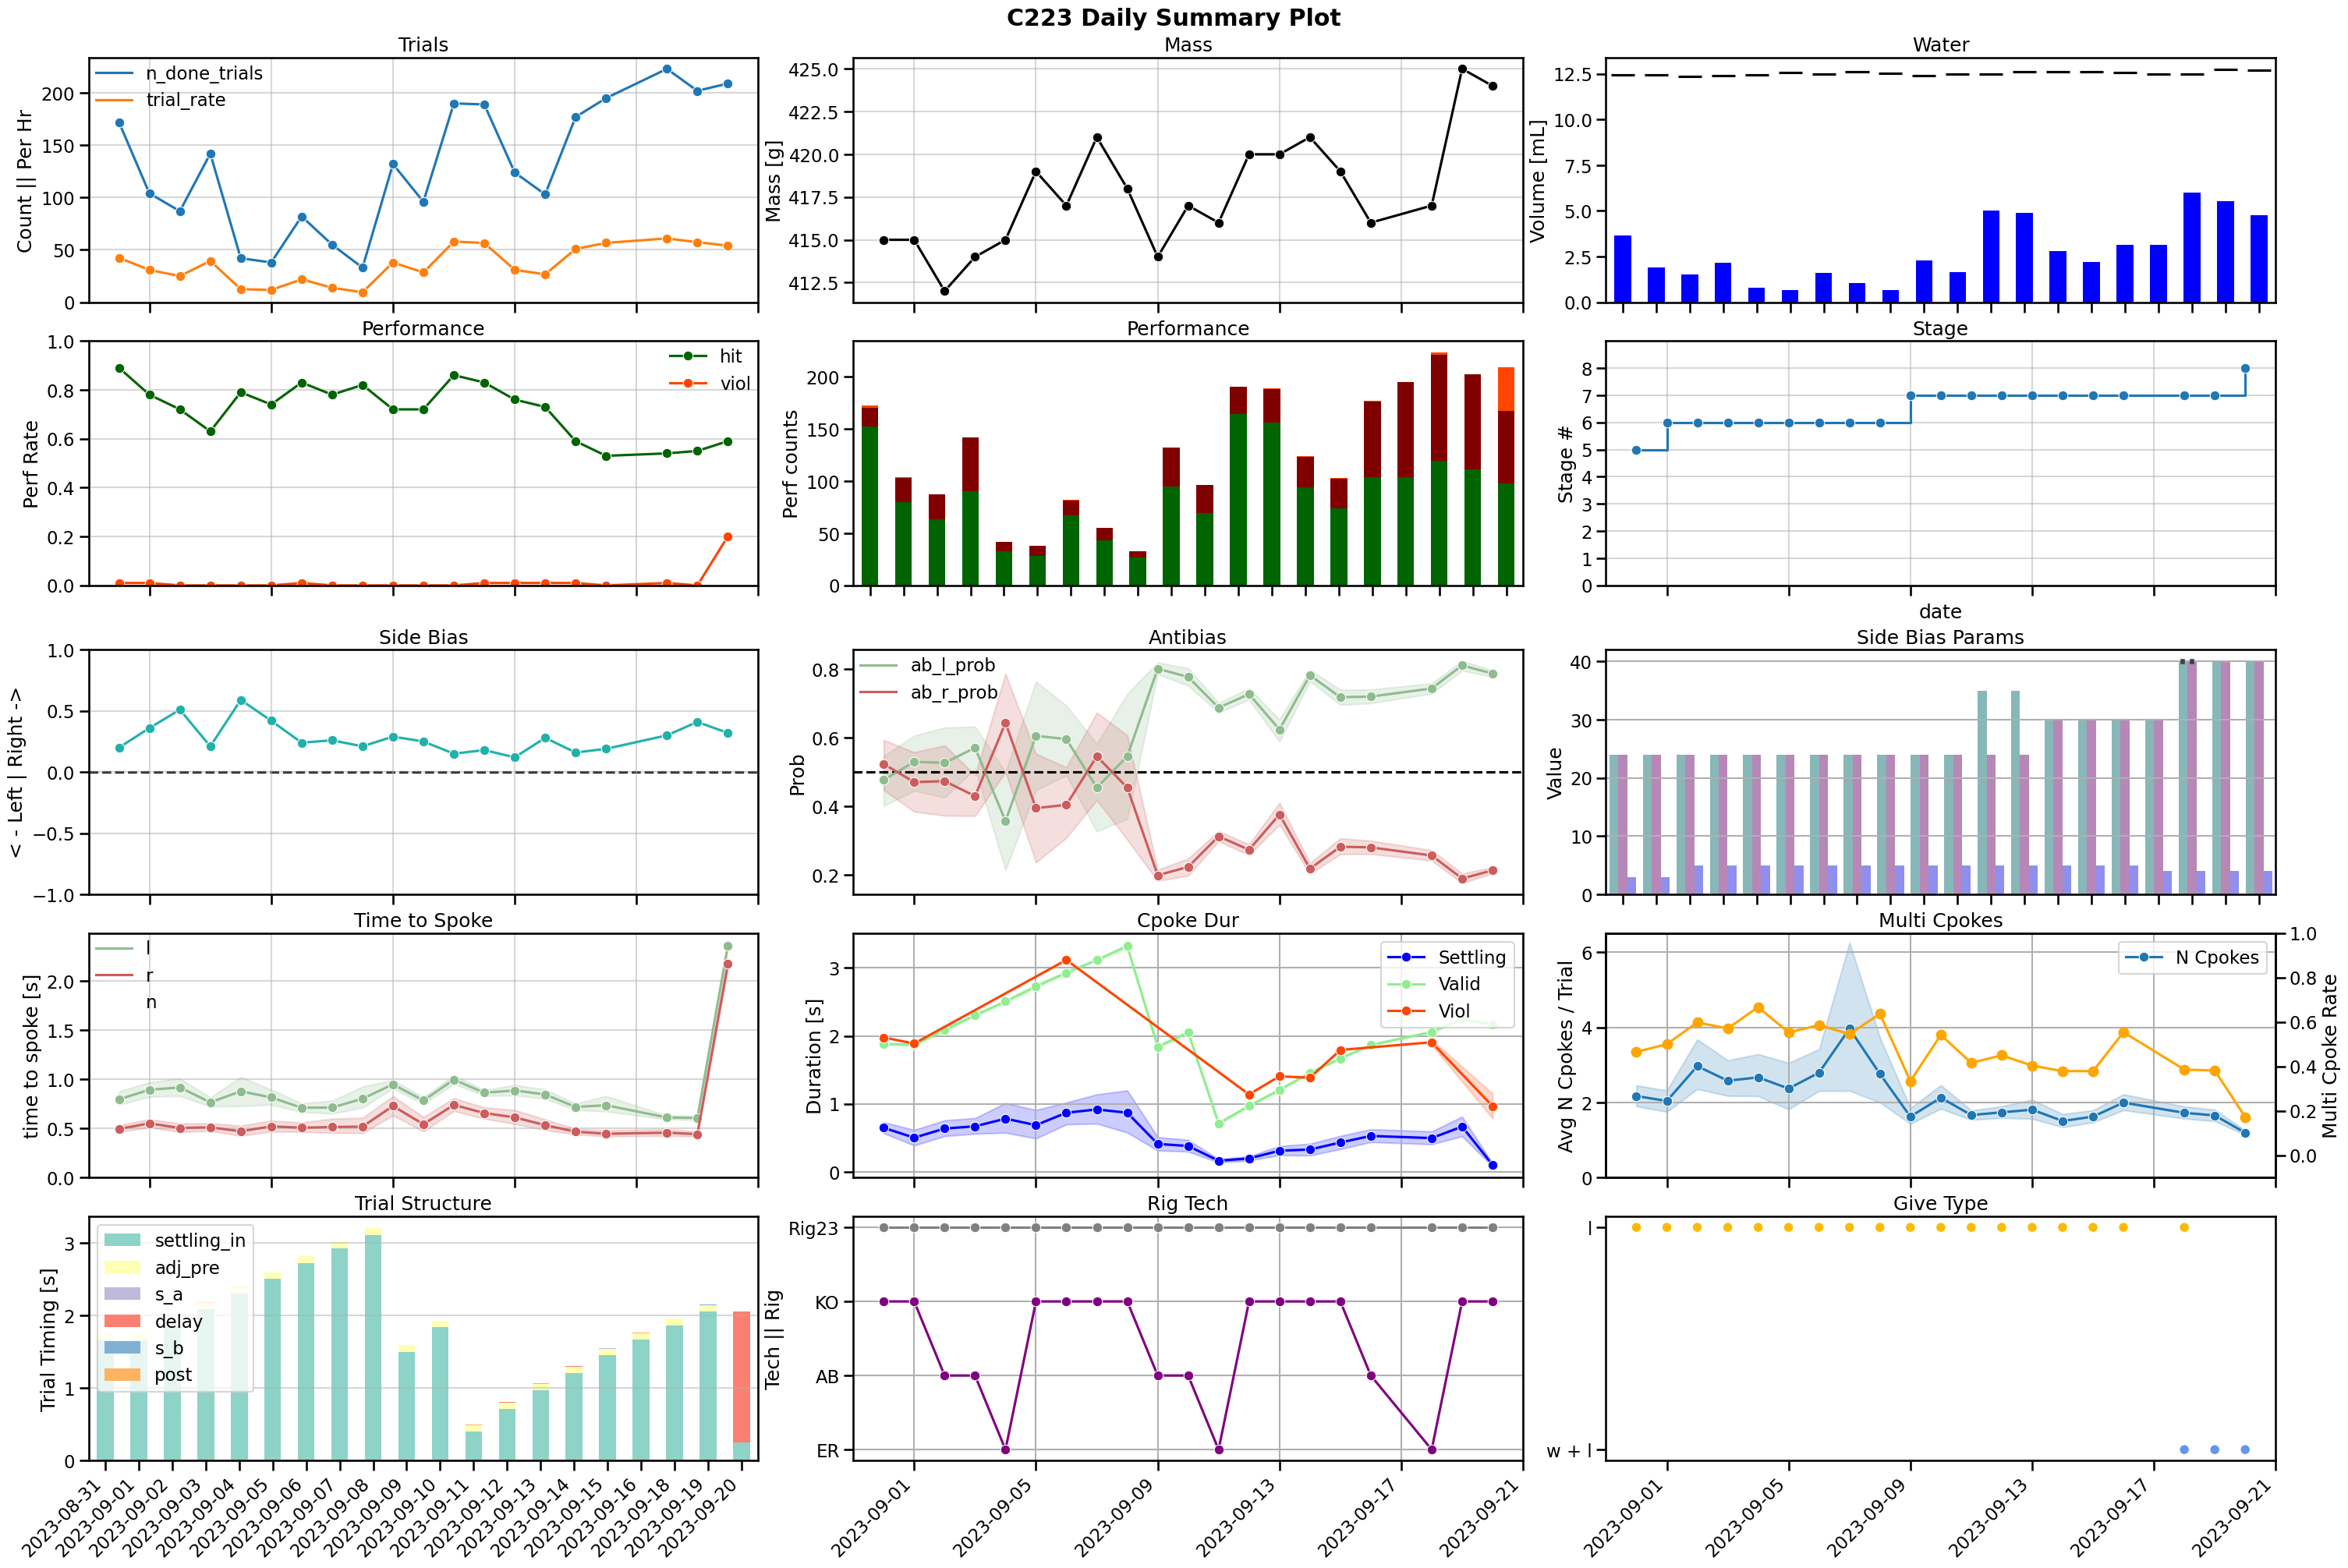

In [11]:
for animal_id, animal_days_df in days_df.groupby("animal_id"):
    animal_trials_df = trials_df.query("animal_id == @animal_id")
    multiplot_multi_day_summary(
        animal_id, animal_days_df, animal_trials_df.reset_index()
    )